## Preamble

In [ ]:
#pip install sympy
#pip install numpy
#pip install pandas
#pip install matplotlib

In [ ]:
pip install datetime

In [ ]:
pip install csv

In [1]:
import numpy as np
from sympy import symbols, Eq, solve
from sympy.interactive import printing
from sympy import pi
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## 02.12 -03.12 Offline Kalibrierung

### Import data

In [ ]:
# File import
with open('calibrationdata.txt', 'r') as file:
    lines = file.readlines()[0:]

data = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df = pd.DataFrame(data, columns=columns)
print(df)

In [ ]:
df

### Korrelationsgleichung fuer die Kalibrierung

In [ ]:
# LaTeX rendering
printing.init_printing()

In [ ]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sub,lambda_air,f,P,I = symbols('dR dT L lambda_sub lambda_air f P I')


In [ ]:
equation_dRdT = Eq( ((-4*pi*L)/(P*I))*(lambda_sub)*(dVdf)- dRdT,0)

In [ ]:
display(equation_dRdT)

### dR/dT Berechnung (unter Cryo)

#### Parameters fuer die Berechnung

In [ ]:
# Geometrie und Bedingungen
T_ref=25                  # Room temperature, 25 03.12.24
lambda_substrate_ref= 1.2 # Temperature 20C

# Slope dRe(V3w)/dlnf Berechnung
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess= df['Power'].values
P_mess=P_mess.astype(float)

I_mess= df['Current'].values
I_mess=I_mess.astype(float)

#### Substrate thermal conductivity

In [ ]:
lambdaSubstrate=lambda T: 1.2 + 0.0013*(T-20)

#### Slope dRe(V3w)/dln(f)

In [ ]:
v3w

In [ ]:
lnf=np.log(f)

In [ ]:
print(v3w)
print(f)
print(lnf)

In [ ]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [ ]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

#### dR/dT Berechnung

In [ ]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
lambdaSubstrate_mess=lambdaSubstrate(T_ref)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)

In [ ]:
substituted_eq = equation_dRdT.subs({P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [ ]:
substituted_eq

In [ ]:
sol = solve(substituted_eq, dRdT)

In [ ]:
dRdT_mess=float(sol[0])
print(dRdT_mess)

## 03.12 Messungtest

### Import data

In [ ]:
# File import
with open('testdata.txt', 'r') as file:
    lines = file.readlines()[0:]

data_sample = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data_sample.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df_sample = pd.DataFrame(data_sample, columns=columns)
print(df_sample)

In [ ]:
dRdT_mess=float(sol[0])

In [ ]:
print(dRdT_mess)

### Korrelationsgleichung fuer die Messung

In [ ]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sample,lambda_sub,f,P,I = symbols('dR dT L lambda_sample, lambda_sub f P I')

In [ ]:
equation_lambdaSample= Eq( (-P*I*dRdT/(4*pi*L))*(dVdf)**(-1)-lambda_sub-lambda_sample,0)

In [ ]:
display(equation_lambdaSample)

### Thermal conductivity Berechnung

#### Parameters fuer die Berechnung

In [ ]:
# Geometrie und Bedingungen
T_ref=24                  # Room temperature
lambda_substrate_ref= 1.2 # Temperature 20C
print(dRdT_mess)

# Slope dRe(V3w)/dlnf Berechnung
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess= df['Power'].values
P_mess=P_mess.astype(float)

I_mess= df['Current'].values
I_mess=I_mess.astype(float)

#### Slope dRe(V3w)/dln(f)

In [ ]:
v3w

In [ ]:
lnf=np.log(f)

In [ ]:
print(v3w)
print(f)
print(lnf)

In [ ]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [ ]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

#### Thermal conductivity der Probe Berechnung

In [ ]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
lambdaSubstrate_mess=lambdaSubstrate(T_ref)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)
print(dRdT_mess)

In [ ]:
substituted_eqLambdaSample = equation_lambdaSample.subs({dRdT:dRdT_mess,P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [ ]:
substituted_eqLambdaSample

In [ ]:
solSample = solve(substituted_eq, dRdT)

In [ ]:
lambdaSample_mess=float(solSample[0])
print(lambdaSample_mess)

## 04.12-05.12 Calibration mit Grease und Substrates thermal conductivity messung

## 06.12.24 Conductivity of multilayers

### Series

In [ ]:
k_glass=1.2
k_pasivation=1.36
k_al=237
h_glass=0.7e-3
h_pas=200e-9
h_al=80e-9


In [ ]:
h_eq=h_al+h_pas
keq=h_eq/((h_al/k_al)+(h_pas/k_pasivation))

In [ ]:
h_eq

In [ ]:
keq

### Parallel

In [ ]:
k_eq2=(h_eq)*(keq/h_eq + (k_glass/h_glass))

In [ ]:
k_eq2

## 10.12.24 T vs R Erster Ansazt


In [2]:
input_file= "resistance.csv"
data = []
with open(input_file, "r") as file:
    for line in file:
        # Split the line into parts
        parts = line.strip().split('"')
        date = int(parts[0].strip('"'))  # Remove leading/trailing quotes and convert to int
        temperature = float(parts[1].strip('"').replace(',', '.'))  # Remove quotes and convert to float
        resistance = float(parts[2].strip('"').replace(',', '.'))  # Remove quotes and convert to float
        data.append([date, temperature, resistance])

# Create DataFrame
df = pd.DataFrame(data, columns=["date", "temperature", "resistance"])


ValueError: invalid literal for int() with base 10: ''

In [3]:
df

NameError: name 'df' is not defined

In [4]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'resistance.csv'

# Read the CSV file, specifying the comma as the decimal separator
df = pd.read_csv(file_path, delimiter=',', header=None)

# Replace commas in numbers with dots
df[1] = df[1].str.replace(',', '.').astype(float)
df[2] = df[2].str.replace(',', '.').astype(float)

# Optionally, assign column names
df.columns = ['ID', 'Value1', 'Value2']

# Show the DataFrame
print(df)

KeyError: 1

In [5]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'resistance.csv'

# Read the CSV file with quoted values and no header
df = pd.read_csv(file_path, header=None, quotechar='"')

# Replace commas in numbers with dots and convert them to float
df[1] = df[1].str.replace(',', '.').astype(float)
df[2] = df[2].str.replace(',', '.').astype(float)

# Optionally, assign column names
df.columns = ['ID', 'Value1', 'Value2']

# Show the DataFrame
print(df)

KeyError: 1

In [6]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'resistance.csv'

# Read the CSV file, specifying the separator as a comma, but ensuring that quoted commas are preserved.
df = pd.read_csv(file_path, header=None, quotechar='"')

# Check the DataFrame structure to make sure it was read correctly
print(df.head())

# If necessary, replace commas in numbers with dots and convert them to float
df[1] = df[1].str.replace(',', '.').astype(float)
df[2] = df[2].str.replace(',', '.').astype(float)

# Optionally, assign column names
df.columns = ['ID', 'Value1', 'Value2']

# Show the DataFrame
print(df)

                                    0
0  1733760599,"21,577000","34,498748"
1  1733760600,"21,591999","34,500464"
2  1733760601,"21,589001","34,500464"
3  1733760602,"21,582001","34,496812"
4  1733760603,"21,601999","34,497272"


KeyError: 1

In [7]:
df

,0
0,"1733760599,""21,577000"",""34,498748"""
1,"1733760600,""21,591999"",""34,500464"""
2,"1733760601,""21,589001"",""34,500464"""
3,"1733760602,""21,582001"",""34,496812"""
4,"1733760603,""21,601999"",""34,497272"""
...,...
66909,"1733827508,""21,483000"",""34,487716"""
66910,"1733827509,""21,483000"",""34,489380"""
66911,"1733827510,""21,487000"",""34,489788"""
66912,"1733827511,""21,487000"",""34,489788"""


In [8]:
# Read the CSV file manually
df = pd.read_csv('resistance.csv', header=None, quotechar='"', delimiter=',')

# Print the dataframe's first few rows to inspect the data
print(df.head())


                                    0
0  1733760599,"21,577000","34,498748"
1  1733760600,"21,591999","34,500464"
2  1733760601,"21,589001","34,500464"
3  1733760602,"21,582001","34,496812"
4  1733760603,"21,601999","34,497272"


In [9]:
import pandas as pd

# Initialize an empty list to store the split rows
split_data = []

# Open the file
with open("resistance.csv", "r") as file:
    # Loop through each line in the file
    for line in file:
        # Split the line by a delimiter (e.g., space, comma, etc.)
        row_data = line.strip().split('"')  # You can change the delimiter if needed
        split_data.append(row_data)  # Add the split row to the list

# Create a DataFrame where each row in `split_data` becomes a row in the DataFrame
df = pd.DataFrame(split_data)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,,"1733760599,",,"21,577000",,",",,"34,498748",,,
1,,"1733760600,",,"21,591999",,",",,"34,500464",,,
2,,"1733760601,",,"21,589001",,",",,"34,500464",,,
3,,"1733760602,",,"21,582001",,",",,"34,496812",,,
4,,"1733760603,",,"21,601999",,",",,"34,497272",,,
...,...,...,...,...,...,...,...,...,...,...,...
66909,,"1733827508,",,"21,483000",,",",,"34,487716",,,
66910,,"1733827509,",,"21,483000",,",",,"34,489380",,,
66911,,"1733827510,",,"21,487000",,",",,"34,489788",,,
66912,,"1733827511,",,"21,487000",,",",,"34,489788",,,


In [ ]:
df[1]

In [ ]:
data = {
    'Column1': df[1],
    'Column2': df[3],
    'Column3': df[7],
    
}
df_clean = pd.DataFrame(data)

In [ ]:
df_clean

In [ ]:
# Remove commas in the first column
df_clean['Column1'] = df_clean['Column1'].str.replace(',', '', regex=False)

# Convert the second and third columns to float (replace commas with dots)
df_clean['Column2'] = df_clean['Column2'].str.replace(',', '.').astype(float)
df_clean['Column3'] = df_clean['Column3'].str.replace(',', '.').astype(float)

In [ ]:
df_clean

In [ ]:
df_clean["Column1"][10:20]

In [ ]:
X=df_clean["Column2"][551:4085]
Y=df_clean["Column3"][551:4085]
# Plot the data 
plt.plot(X, Y, color='red')
plt.xlabel('Temperature')
plt.ylabel('Resistance')
plt.legend()
plt.show()

In [ ]:
df_clean['Gradient'] = (df_clean['Column3'][551:4085].diff() / df_clean['Column2'][551:4085].diff())

In [ ]:
df_clean[551:4085]

In [ ]:
X=df_clean["Column2"][1000:2000]
Y=df_clean["Gradient"][1000:2000]
# Plot the data 
plt.plot(X, Y, color='red')
plt.xlabel('Temperature')
plt.ylabel('Gradient')
plt.legend()
plt.show()

In [ ]:

# Perform polynomial fitting (e.g., 1st degree for linear fit)
degree = 3
coefficients = np.polyfit(X, Y, degree)

# Print the polynomial coefficients
print("Polynomial coefficients:", coefficients)

# Generate fitted values
Y_fit = np.polyval(coefficients, X)

# Plot the data and the fit
plt.scatter(X, Y, label='Data', color='blue')
plt.plot(X, Y_fit, label=f'{degree}-degree fit', color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Resistance (Ohm)')
plt.legend()
plt.show()

In [ ]:
gradient_coefficients = np.polyder(coefficients)

# Generate the gradient values
Y_gradient = np.polyval(gradient_coefficients, X)

# Print the gradient coefficients
print("Gradient (derivative) coefficients:", gradient_coefficients)

# Plot the original data and the gradient
plt.scatter(X, Y, label='Data', color='blue')
plt.plot(X, np.polyval(coefficients, X), label=f'{degree}-degree fit', color='red')
plt.plot(X, Y_gradient, label='Gradient', color='green', linestyle='--')
plt.legend()
plt.show()

In [ ]:
Y_gradient


In [ ]:
plt.plot(X, Y_gradient, label='Gradient', color='green', linestyle='--')
plt.xlabel('Temperature(°C)')
plt.ylabel('dR/dT (Ohm/°C)')
plt.legend()
plt.show()


## 15.01.2025 Korrelation Resistance vs Temperatur

In [12]:
# Read the CSV file manually
df = pd.read_csv('resistance.csv', header=None, quotechar='"', delimiter=',')

# Print the dataframe's first few rows to inspect the data
print(df.head())


                                    0
0  1733760599,"21,577000","34,498748"
1  1733760600,"21,591999","34,500464"
2  1733760601,"21,589001","34,500464"
3  1733760602,"21,582001","34,496812"
4  1733760603,"21,601999","34,497272"


In [13]:
import pandas as pd

# Initialize an empty list to store the split rows
split_data = []

# Open the file
with open("resistance.csv", "r") as file:
    # Loop through each line in the file
    for line in file:
        # Split the line by a delimiter (e.g., space, comma, etc.)
        row_data = line.strip().split('"')  # You can change the delimiter if needed
        split_data.append(row_data)  # Add the split row to the list

# Create a DataFrame where each row in `split_data` becomes a row in the DataFrame
df = pd.DataFrame(split_data)

In [20]:
data = {
    'Datum': df[1],
    'Temp': df[3],
    'Resistance': df[7],
    
}
df_clean = pd.DataFrame(data)

In [23]:
# Remove commas in the first column
df_clean['Datum'] = df_clean['Datum'].str.replace(',', '', regex=False)

# Convert the second and third columns to float (replace commas with dots)
df_clean['Temp'] = df_clean['Temp'].str.replace(',', '.').astype(float)
df_clean['Resistance'] = df_clean['Resistance'].str.replace(',', '.').astype(float)

In [24]:
df_clean

,Datum,Temp,Resistance
0,1733760599,21.577000,34.498748
1,1733760600,21.591999,34.500464
2,1733760601,21.589001,34.500464
3,1733760602,21.582001,34.496812
4,1733760603,21.601999,34.497272
...,...,...,...
66909,1733827508,21.483000,34.487716
66910,1733827509,21.483000,34.489380
66911,1733827510,21.487000,34.489788
66912,1733827511,21.487000,34.489788


### Fitting

C:\Users\rinc\AppData\Local\Temp\ipykernel_4280\1708120713.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


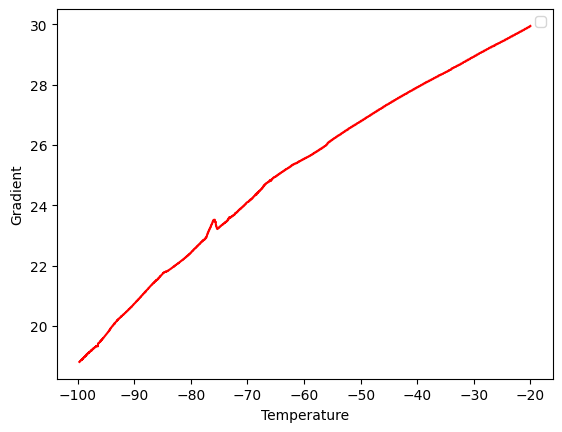

In [27]:
X=df_clean["Temp"][1000:4000]
Y=df_clean["Resistance"][1000:4000]
# Plot the data 
plt.plot(X, Y, color='red')
plt.xlabel('Temperature')
plt.ylabel('Gradient')
plt.legend()
plt.show()

Polynomial coefficients: [4.49342033e-06 3.01458496e-05 8.77508191e-02 3.16643309e+01]


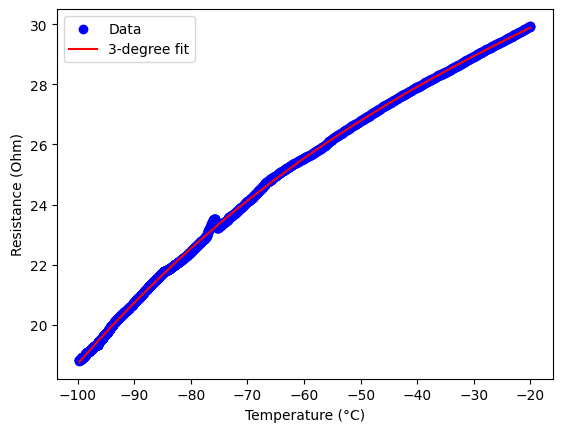

In [28]:

# Perform polynomial fitting (e.g., 1st degree for linear fit)
degree = 3
coefficients = np.polyfit(X, Y, degree)

# Print the polynomial coefficients
print("Polynomial coefficients:", coefficients)

# Generate fitted values
Y_fit = np.polyval(coefficients, X)

# Plot the data and the fit
plt.scatter(X, Y, label='Data', color='blue')
plt.plot(X, Y_fit, label=f'{degree}-degree fit', color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Resistance (Ohm)')
plt.legend()
plt.show()

Gradient (derivative) coefficients: [1.34802610e-05 6.02916993e-05 8.77508191e-02]


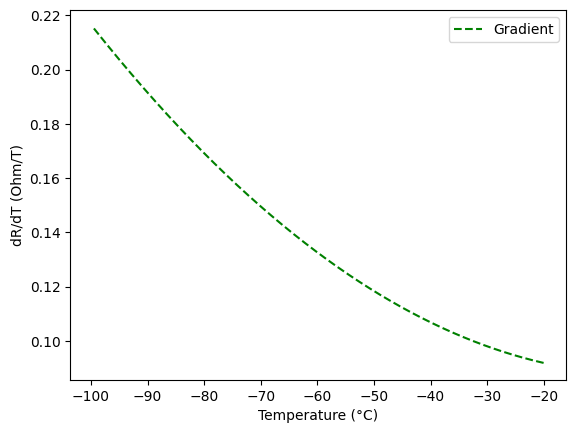

In [31]:
gradient_coefficients = np.polyder(coefficients)

# Generate the gradient values
Y_gradient = np.polyval(gradient_coefficients, X)

# Print the gradient coefficients
print("Gradient (derivative) coefficients:", gradient_coefficients)

# Plot the original data and the gradient

plt.plot(X, Y_gradient, label='Gradient', color='green', linestyle='--')
plt.xlabel('Temperature (°C)')
plt.ylabel('dR/dT (Ohm/T)')
plt.legend()
plt.show()